## Advanced Lane Finding Project

The goals / steps of this project are the following:

* **Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.**
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

In [2]:
# draw images based on image_dict
def show_output_images(image_dict, cols=4, rows=5, figsize=(15,13)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    indexes = range(rows * cols)

    for ax, index in zip(axes.flat, image_dict.keys()):
        ax.imshow(image_dict[index])
        ax.set_title(index)
        ax.axis('off')

In [3]:
# undistort image
def undistort(img):
    ret , mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2], None, None)
    pickle.dump( {'mtx': mtx, 'dist': dist}, open('./camera_calibration_parameters', 'wb'))
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

In [12]:
# compare original with results
def compare(fname, original_dict, output_dict, undistort_dict):
    if fname in output_dict:
        fig, axes = plt.subplots(ncols=3, figsize=(20, 10))
        axes[0].imshow(original_dict[fname])
        axes[0].set_title('original')
        axes[1].imshow(output_dict[fname])
        axes[1].set_title('with points')
        axes[2].imshow(undistort_dict[fname])
        axes[2].set_title('undistorted')
    else:
        fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
        axes[0].imshow(original_dict[fname])
        axes[0].set_title('original')
        axes[1].imshow(undistort_dict[fname])
        axes[1].set_title('undistorted')
    output_name = fname.split("/")
    plt.savefig('undistorted_'+output_name[-1])

In [5]:
# Make dictionaries of calibration images
fnames = glob.glob('../camera_cal/calibration*.jpg')
original_images = {}
replica_images = {}
for fname in fnames:
    original_images[fname] = cv2.imread(fname)
    replica_images[fname] = cv2.imread(fname)
    
# Make output dictionaries
with_points_images = {}
undistort_images = {}
            
# Step through the dictionary and search for chessboard corners
for fname, image in replica_images.items():
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        with_points_img = cv2.drawChessboardCorners(image, (9,6), corners, ret)
        with_points_images[fname] = with_points_img
        undistort_images[fname] = undistort(original_images[fname])

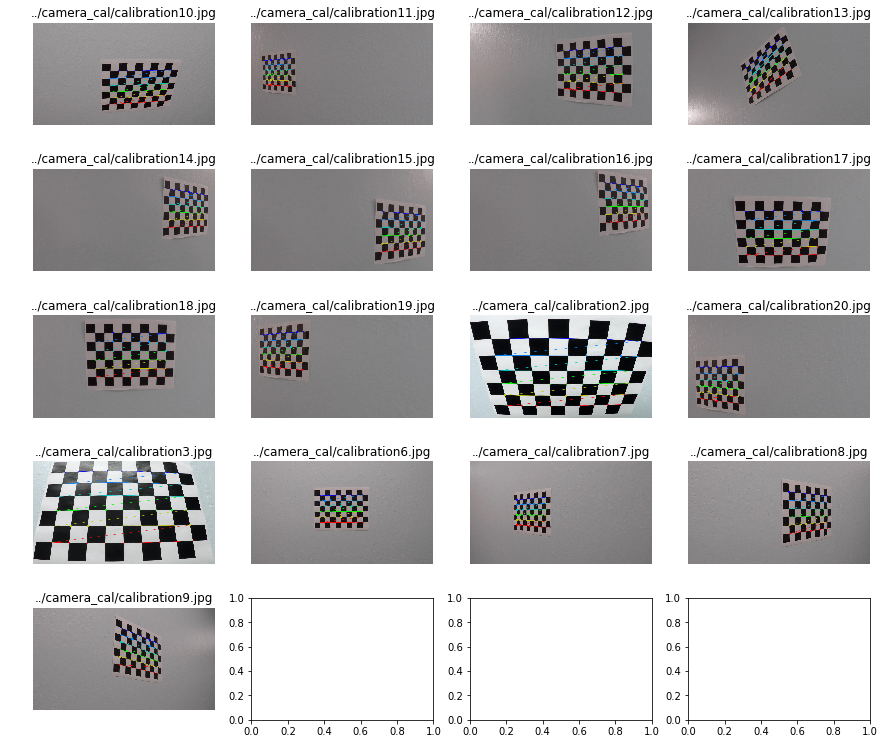

In [6]:
show_output_images(with_points_images)

Above code can not find chessboard corner of some images(No.1, No.4, and No5).
I will pick up result of No2 in below.

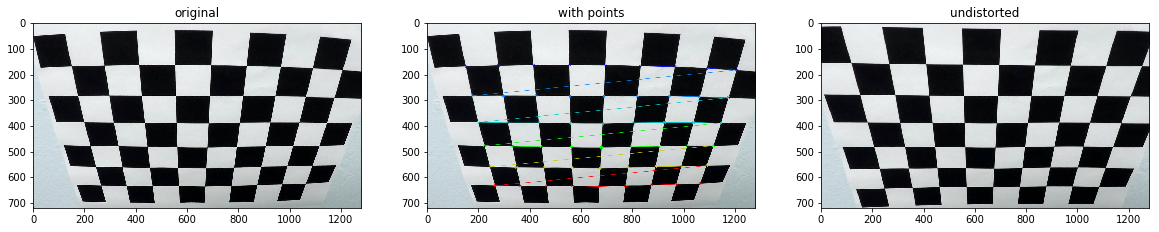

In [13]:
compare("../camera_cal/calibration2.jpg", original_images, with_points_images, undistort_images)

The No.1 picture have not corners in image. But, we can undistort.

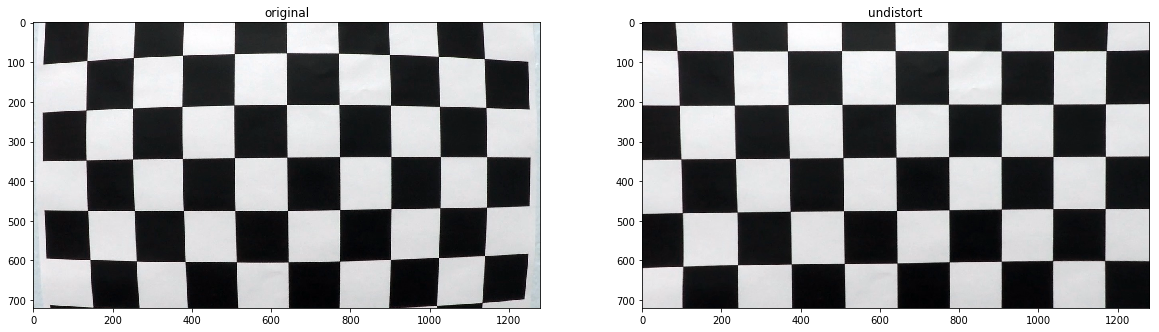

In [11]:
tmp_fname = "../camera_cal\calibration1.jpg"
undistort_images[tmp_fname] = undistort(original_images[tmp_fname])
compare(tmp_fname, original_images, with_points_images, undistort_images)

## Apply a distortion correction to raw images.

In [12]:
example_image = cv2.imread('../test_images/test1.jpg')
example_image = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)

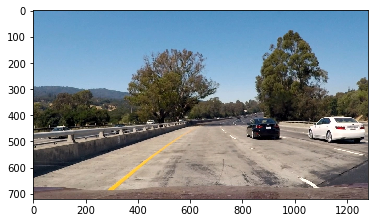

In [13]:
plt.imshow(example_image)

In [35]:
example_undistorted_image = undistort(example_image)

<class 'numpy.ndarray'>
hoge
<class 'numpy.ndarray'>


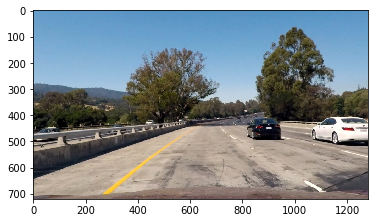

In [36]:
plt.imshow(example_undistorted_image)

Text(0.5, 1.0, 'undistort')

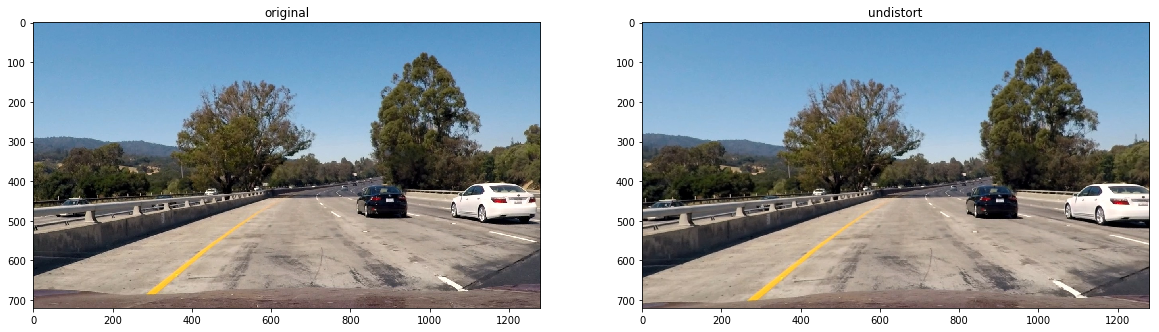

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(example_image)
ax1.set_title('original')
ax2.imshow(example_undistorted_image)
ax2.set_title('undistort')

## Use color transforms, gradients, etc., to create a thresholded binary image